In [41]:
from flask import Flask, render_template, request, redirect, url_for
from torch import cuda
import transformers
import pandas as pd
import matplotlib as plt
import seaborn as sb
import matplotlib.pyplot as ppl
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
import re
import numpy as np
import os
import random
import cv2
import sklearn
import torch
import string
import tensorflow as tf 
import keras
from PIL import Image
from pathlib import Path
from fastai.vision.all import *
from fastai.callback import *
from fastai.metrics import error_rate
from fastai.callback.tracker import EarlyStoppingCallback
from fastai.vision.all import get_image_files
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from preprocessing.text import Tokenizer
from utils import pad_sequences
import warnings
from flask import json
from flask import jsonify
import joblib
import base64

In [47]:
image_model_path = r"C:\Users\virin\OneDrive\Desktop\Synapse 2.0-Datadynamos\Images\model.pk1"
neural_net_model_path = r"C:\Users\virin\OneDrive\Desktop\Synapse 2.0-Datadynamos\NeuralNet (2).pkl"


In [48]:
image_model = load_learner(image_model_path)

In [49]:
from joblib import load
neural_net_model=load(neural_net_model_path)

In [57]:
text_test_data=pd.read_json("subtaskB_test.jsonl", lines=True)
def preprocess_text(text):

    text = re.sub('[^a-zA-Z]', ' ', text)

    words = text.lower().split()

    cleaned_text = ' '.join(words)
    return cleaned_text

text_test_data['cleaned_text'] = text_test_data['text'].apply(preprocess_text)
tokenizer = Tokenizer(num_words=150000)
tokenizer.fit_on_texts(text_test_data['text'].values)

le = len(tokenizer.word_index) + 1
print(le)
sequences = tokenizer.texts_to_sequences(text_test_data['text'].values)
X_test = pad_sequences(sequences, maxlen=1000000)

In [58]:
y_test = text_test_data['label'].values

In [61]:
y_pred = neural_net_model.predict(X_test)

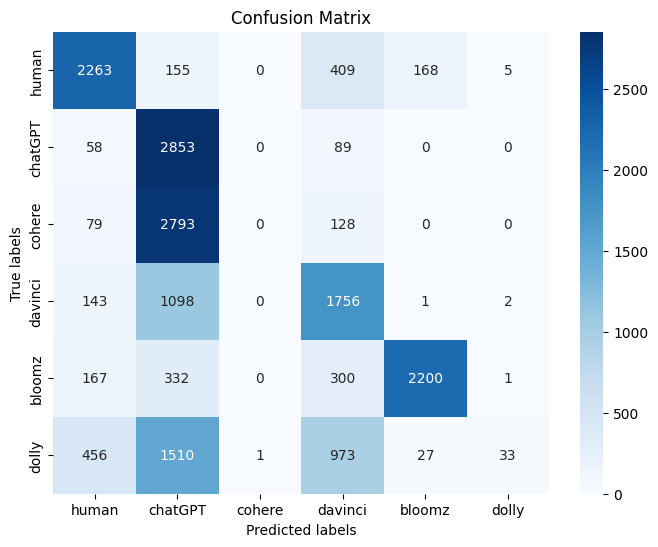

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

index_to_label = {
    0: 'human',
    1: 'chatGPT',
    2: 'cohere',
    3: 'davinci',
    4: 'bloomz',
    5: 'dolly'
}

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[index_to_label[i] for i in range(len(index_to_label))], yticklabels=[index_to_label[i] for i in range(len(index_to_label))])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [135]:
def classify_image(img):
    img = img.resize((224, 224))
    img = PILImage.create(np.array(img))  
    pred, _, _ = image_model.predict(img)
    if pred=="AiArtData":
        res=0
    else:
        res=1
    return res

In [136]:
ai_img_test_data_dir=r"C:\Users\virin\OneDrive\Desktop\Synapse 2.0-Datadynamos\Images Test Data\AI Generated Test"
real_img_test_data_dir=r"C:\Users\virin\OneDrive\Desktop\Synapse 2.0-Datadynamos\Images Test Data\Real Images Test"
true_labels = []
predicted_labels = []

In [137]:
ai_images=os.listdir(ai_img_test_data_dir)
print(len(ai_images))

50


In [ ]:
for image_file in ai_images:
    img_path = rf"{ai_img_test_data_dir}\{image_file}"
    try:  # Load image data to catch any decoding errors
        img = Image.open(img_path)
        true_labels.append(0)
        predicted_labels.append(classify_image(img))
    except Exception as e:
        print("Error:", e)

In [140]:
real_images=os.listdir(real_img_test_data_dir)
print(len(real_images))

50


In [ ]:
for image_file in real_images:
    img_path = rf"{real_img_test_data_dir}\{image_file}"
    try:  # Load image data to catch any decoding errors
        img = Image.open(img_path)
        true_labels.append(1)
        predicted_labels.append(classify_image(img))
    except Exception as e:
        print("Error:", e)

In [144]:
print(len(true_labels))
print(len(predicted_labels))

100
100


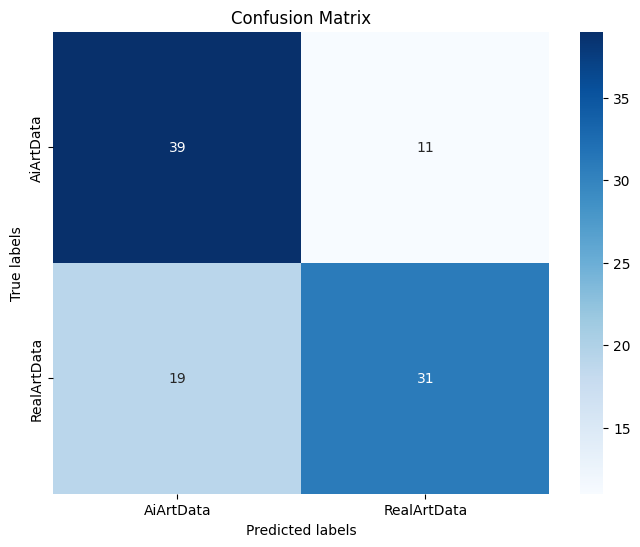

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define label mapping if available
index_to_label = {0: "AiArtData", 1: "RealArtData"} 

conf_matrix=confusion_matrix(true_labels, predicted_labels) # Modify according to your labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[index_to_label[i] for i in range(len(index_to_label))], yticklabels=[index_to_label[i] for i in range(len(index_to_label))])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
